In [1]:
pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ayeshaimran1619/customer-spending-patterns")

print("Path to dataset files:", path)


100%|██████████| 70.5k/70.5k [00:00<00:00, 481kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ayeshaimran1619/customer-spending-patterns/versions/1


In [3]:
import os
os.listdir(path)

['shopping_behavior_updated.csv']

In [4]:
import pandas as pd
file_path=os.path.join(path, "shopping_behavior_updated.csv")
df=pd.read_csv(file_path)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
df.iloc[0]

,0
Customer ID,1
Age,55
Gender,Male
Item Purchased,Blouse
Category,Clothing
Purchase Amount (USD),53
Location,Kentucky
Size,L
Color,Gray
Season,Winter


#Customer Demographic Analysis
## Understanding who are customer are
###Columns used Age, Gender, Location, Subscription Status
###Analysis we can collect from data
###1. Which age group spend the most
###2. Do male or female customers spend more
###3. Which locations generate higher revenue
###4, Do subscribed users shops more frequently


In [6]:
df_four=df[["Age", "Gender", "Location", "Subscription Status" ]]
df_four.head()

,Age,Gender,Location,Subscription Status
0,55,Male,Kentucky,Yes
1,19,Male,Maine,Yes
2,50,Male,Massachusetts,Yes
3,21,Male,Rhode Island,Yes
4,45,Male,Oregon,Yes


#Which age group spend the most
##So for it catogrizing the age group
#### 0-12 Child
#### 13-17 Teenager
#### 18-24 Gen Z
#### 25-34 Young Professional
#### 35-44 Established adult
#### 45-54 Mid life
#### 55-64 Pre-retirement
#### 65+ Retired

In [7]:
#categoring Age groups
age_bins=[0, 12, 17, 24, 34, 44, 54, 64, 100]
group_labels=["Child", "teenager", "genz", "Young Professional", "Established Adult", "Mid life", "Pre-retirement", "Retired"]
#creating a new column for age_group
df['age_group']=pd.cut(df["Age"], bins=age_bins, labels=group_labels, right=True)


In [8]:
df.age_group

,age_group
0,Pre-retirement
1,genz
2,Mid life
3,genz
4,Mid life
...,...
3895,Established Adult
3896,Mid life
3897,Mid life
3898,Established Adult


In [9]:
#Counting total people in each age group
df['age_group'].value_counts()

,count
age_group,
Young Professional,755
Mid life,752
Pre-retirement,751
Established Adult,729
genz,486
Retired,427
Child,0
teenager,0


In [10]:
#Sorting the age group
#dropna=False, if some ages were missing or invalid
df["age_group"].value_counts(dropna=False).sort_index()

,count
age_group,
Child,0
teenager,0
genz,486
Young Professional,755
Established Adult,729
Mid life,752
Pre-retirement,751
Retired,427


<Axes: xlabel='age_group'>

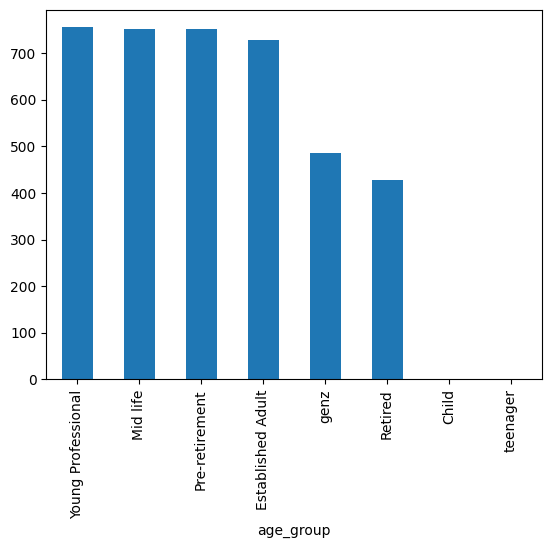

In [11]:
#Visualize the counts
df['age_group'].value_counts().plot(kind='bar')

<Axes: xlabel='age_group'>

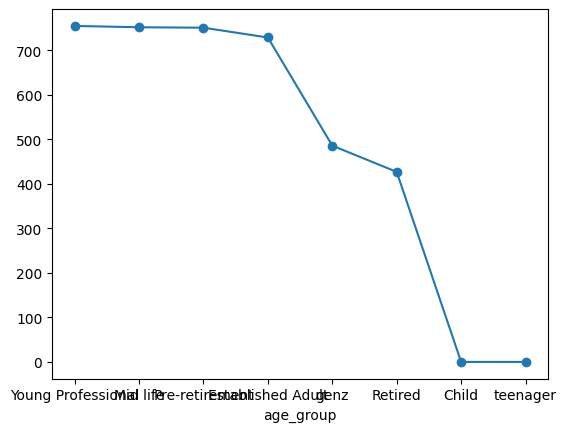

In [12]:
#list of age group spend the most
df['age_group'].value_counts().plot(kind='line', marker='o')

In [13]:
#Categorizing using Male and female to know who spend more
#Using column Purchase amount and column
df['Gender'].value_counts()

,count
Gender,
Male,2652
Female,1248


In [14]:
df['Purchase Amount (USD)'].value_counts()

,count
Purchase Amount (USD),
36,62
32,62
94,62
51,61
90,60
...,...
54,36
49,35
87,35


In [15]:
df.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


In [16]:
df[['Gender', 'Purchase Amount (USD)']].astype(str).stack().value_counts()

,count
Male,2652
Female,1248
36,62
94,62
32,62
...,...
54,36
49,35
87,35
69,34


In [17]:
df.value_counts('Gender', 'Purchase Amount (USD)')

,proportion
Gender,
Male,0.68
Female,0.32


In [18]:
df.groupby('Gender')['Purchase Amount (USD)'].count()

,Purchase Amount (USD)
Gender,
Female,1248
Male,2652


In [19]:
#This tells how much total money is spent by each gender
total_spent=df.groupby('Gender')['Purchase Amount (USD)'].sum()
total_spent
#Converting it into percentage
total_percent=(total_spent/total_spent.sum())*100
print(total_percent)

Gender
Female    32.259601
Male      67.740399
Name: Purchase Amount (USD), dtype: float64


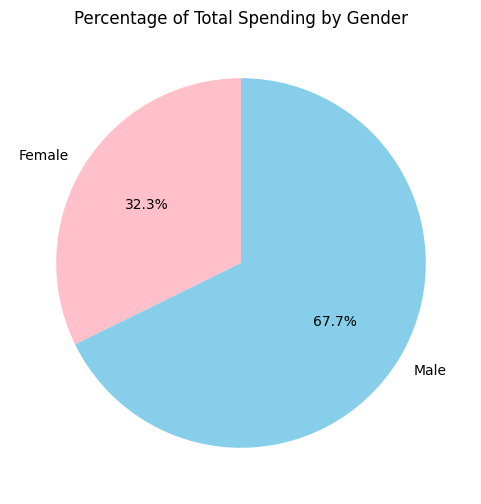

In [20]:
#ploting pie graph for the % of amount spent in pie graph
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
total_percent.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['pink', 'skyblue']
)
plt.ylabel('')
plt.title('Percentage of Total Spending by Gender')
plt.show()

In [21]:
total_spent_by_location=df.groupby('Location')['Purchase Amount (USD)'].sum()
print(total_spent_by_location)

Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee         4772
Texas             4712
Ut

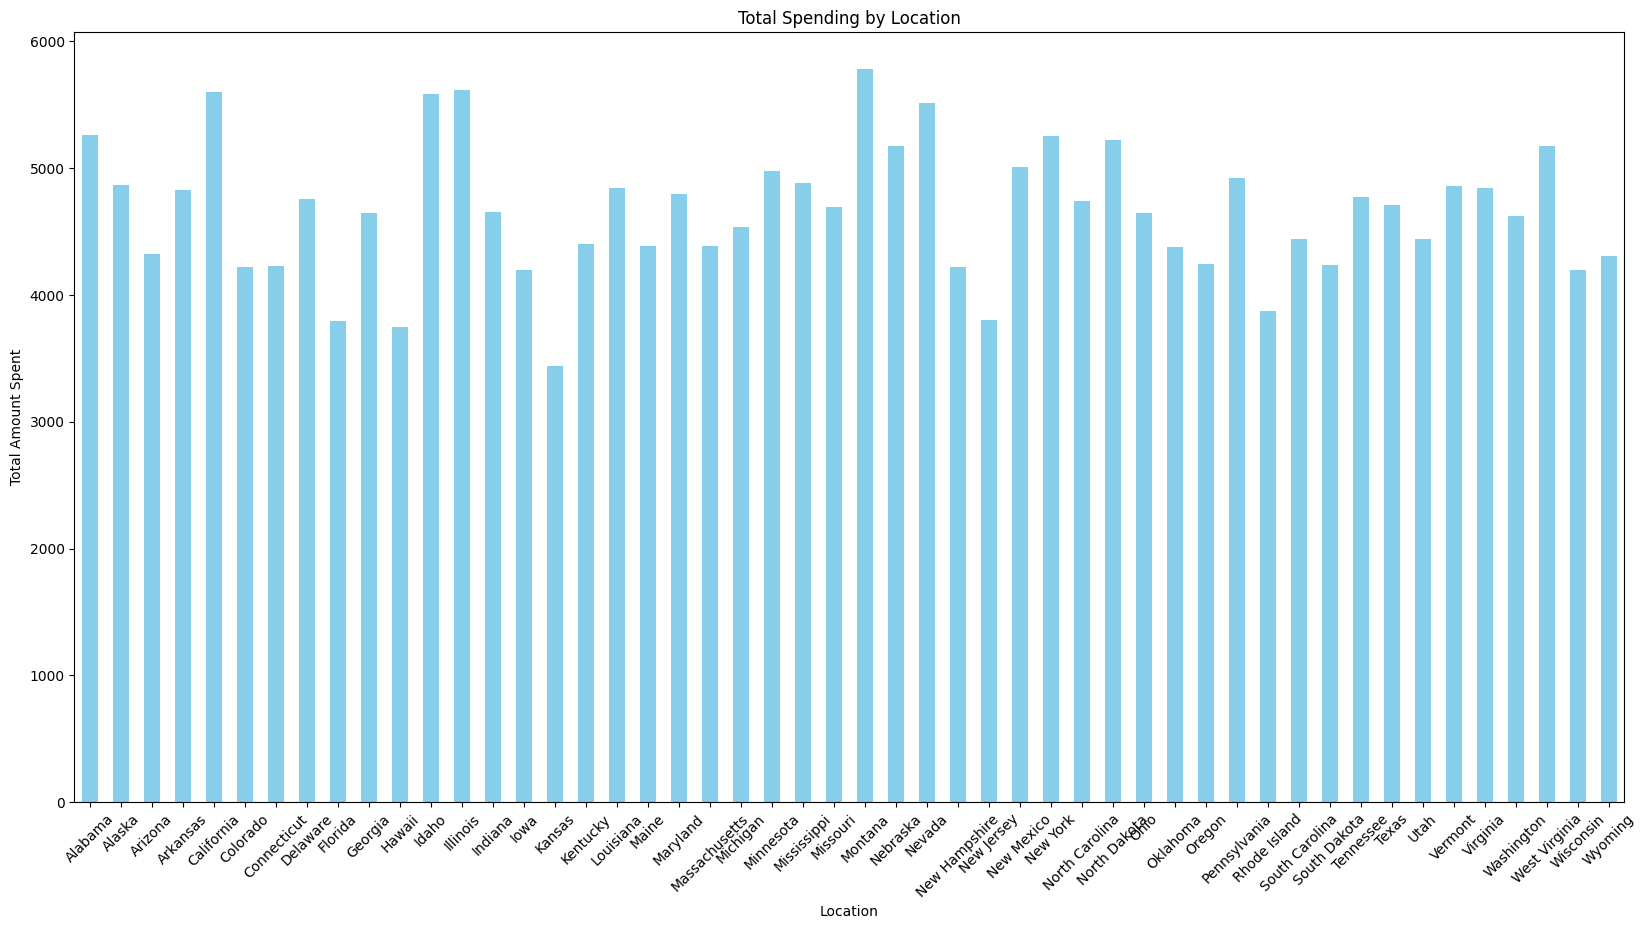

In [22]:
plt.figure(figsize=(20, 10))
total_spent_by_location.plot(kind='bar', color='skyblue')
plt.xlabel('Location')
plt.ylabel('Total Amount Spent')
plt.title('Total Spending by Location')
plt.xticks(rotation=45)
plt.show()

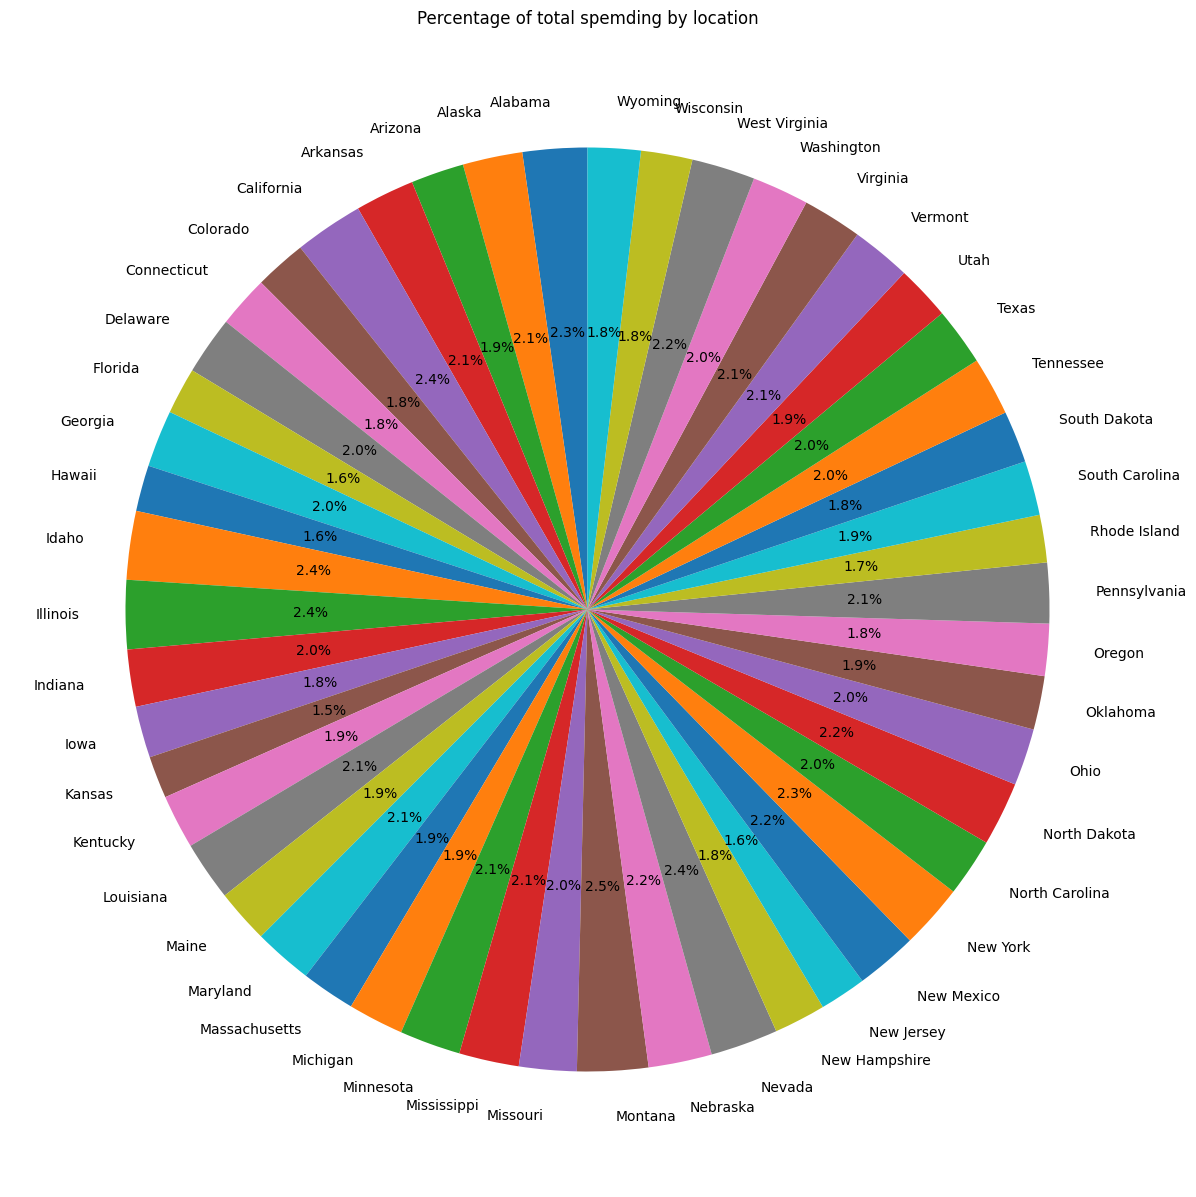

In [23]:
#Ploting a pie chart
plt.figure(figsize=(15,15))
total_spent_by_location.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.ylabel('')
plt.title('Percentage of total spemding by location')
plt.show()

In [24]:
#Total spend by suscribers or members
total_spent_by_subscription=df.groupby('Subscription Status')['Purchase Amount (USD)'].sum()
print(total_spent_by_subscription)

Subscription Status
No     170436
Yes     62645
Name: Purchase Amount (USD), dtype: int64


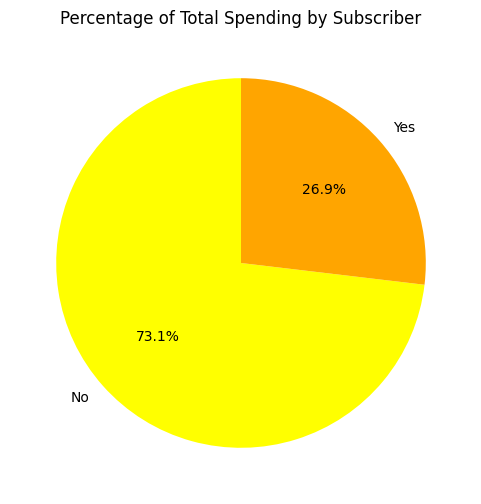

In [25]:
plt.figure(figsize=(6, 6))
total_spent_by_subscription.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['yellow', 'orange']
)
plt.ylabel('')
plt.title('Percentage of Total Spending by Subscriber')
plt.show()

#Product and Category Analysis
##To understand what customers buy
###Column Used: Item purchased, Category, Size, color, season
####Questions:
####1. Top selling categories
####2. Most popular items
####3. Seasonal trends
####4. Popular size & color per category

In [26]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,age_group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Pre-retirement
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,genz
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Mid life
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,genz
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Mid life


In [27]:
category_data=df["Category"]
category_data

,Category
0,Clothing
1,Clothing
2,Clothing
3,Footwear
4,Clothing
...,...
3895,Clothing
3896,Accessories
3897,Accessories
3898,Footwear


In [28]:
grouping_category=df.groupby("Category").size()
grouping_category

,0
Category,
Accessories,1240
Clothing,1737
Footwear,599
Outerwear,324


In [29]:
df["Category"].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


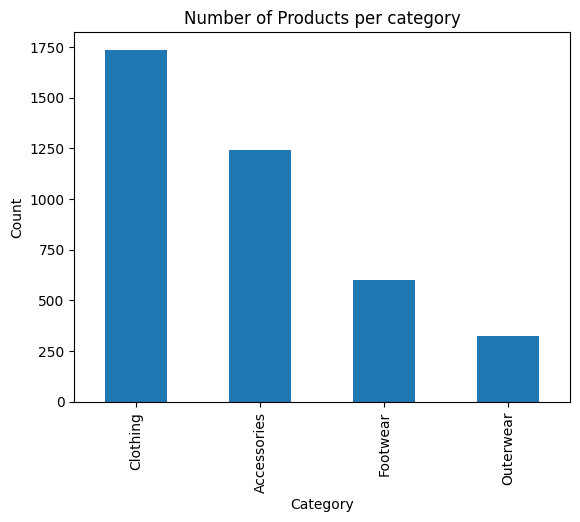

In [30]:
df["Category"].value_counts().plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Number of Products per category")
plt.show()

In [31]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,age_group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Pre-retirement
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,genz
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Mid life
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,genz
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Mid life


In [32]:
item_purchased=df.groupby("Item Purchased").size().sort_values(ascending=False)
item_purchased

,0
Item Purchased,
Blouse,171
Pants,171
Jewelry,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Belt,161
Coat,161


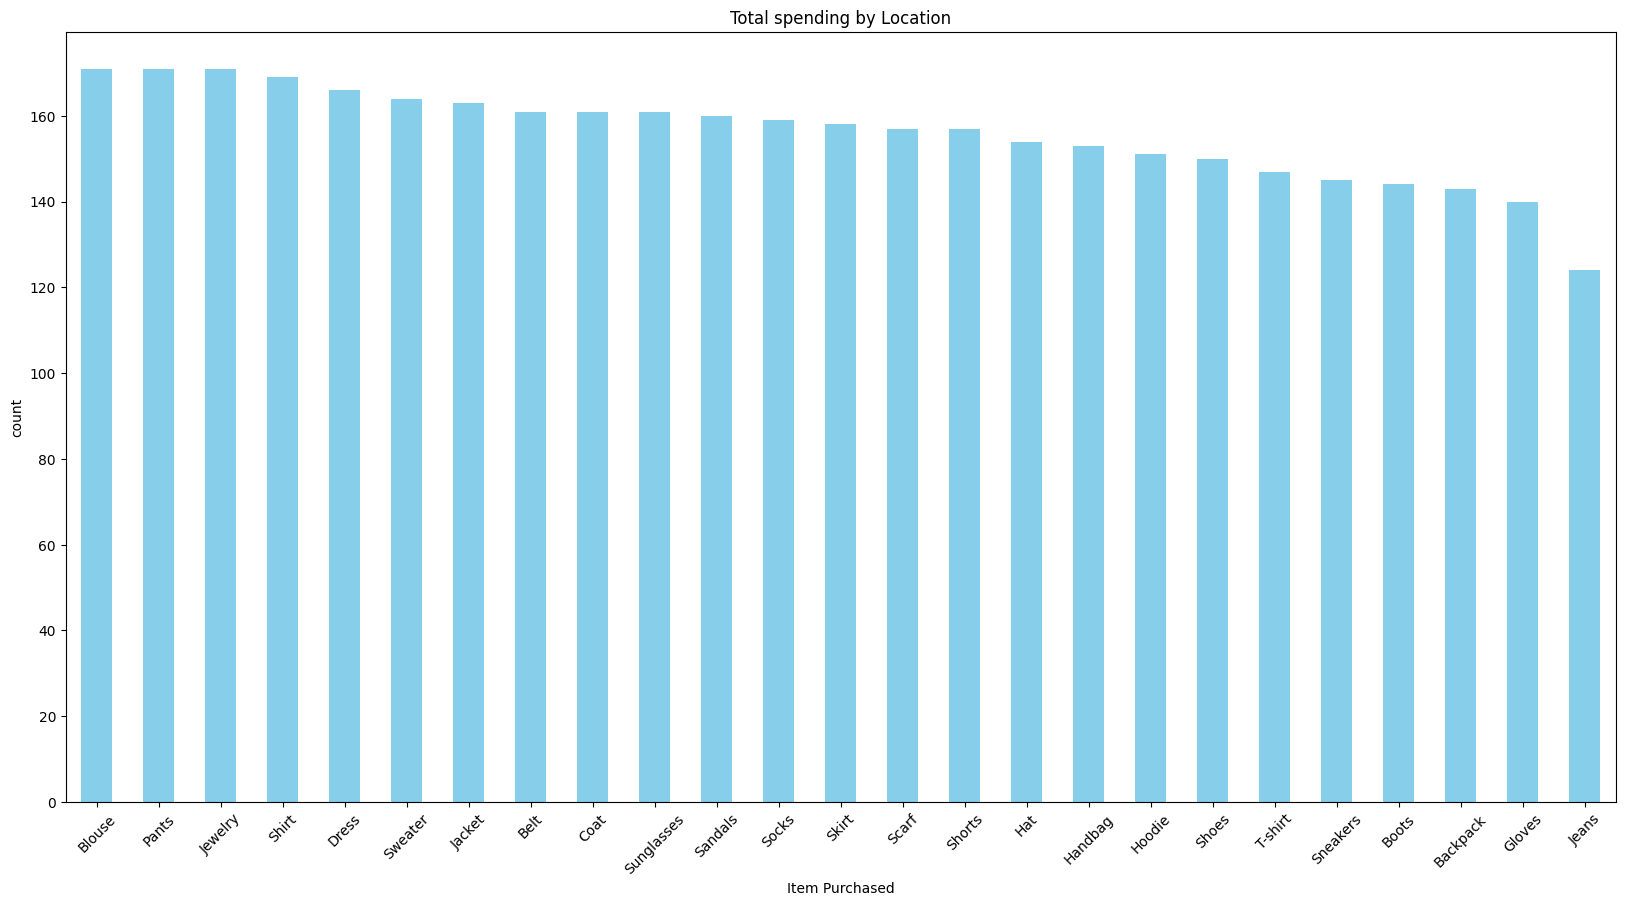

In [33]:
plt.figure(figsize=(20, 10))
item_purchased.plot(kind="bar", color="skyblue")
plt.xlabel("Item Purchased")
plt.ylabel("count")
plt.title("Total spending by Location")
plt.xticks(rotation=45)
plt.show()

In [34]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,age_group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Pre-retirement
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,genz
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Mid life
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,genz
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Mid life


In [35]:
season_trends=df.groupby("Season").size().sort_values(ascending=False)
season_trends

,0
Season,
Spring,999
Fall,975
Winter,971
Summer,955


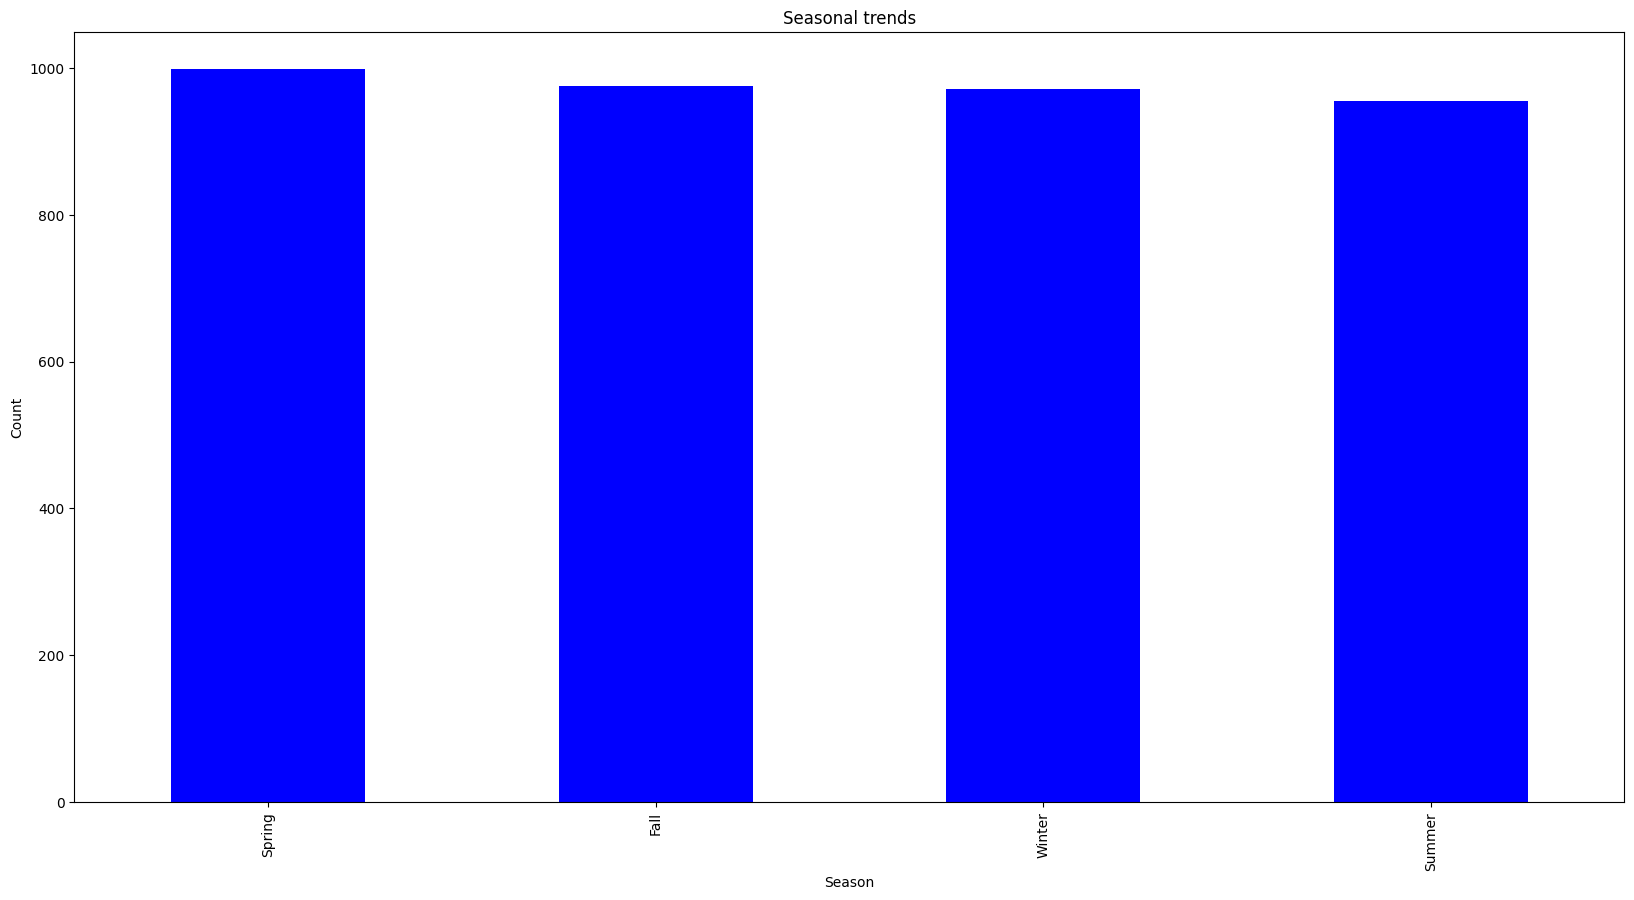

In [36]:
plt.figure(figsize=(20, 10))
season_trends.plot(kind="bar", color="blue")
plt.xlabel("Season")
plt.ylabel('Count')
plt.title('Seasonal trends')
plt.show()

In [37]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,age_group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Pre-retirement
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,genz
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Mid life
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,genz
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Mid life


In [38]:
size_color=df.groupby(["Size", "Color"]).size()
size_color

Size  Color    
L     Beige        30
      Black        53
      Blue         48
      Brown        40
      Charcoal     32
                   ..
XL    Teal         19
      Turquoise    18
      Violet       14
      White        20
      Yellow       22
Length: 100, dtype: int64

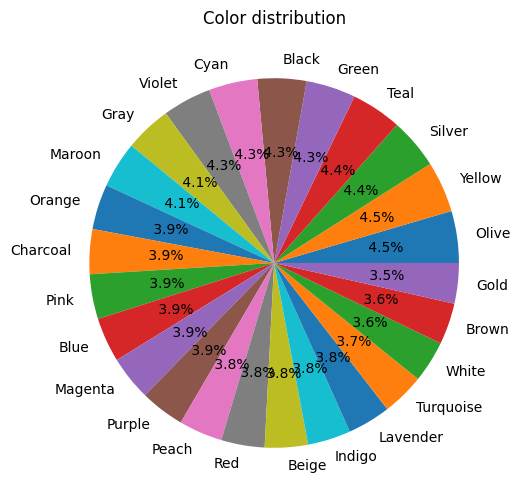

In [39]:
df["Color"].value_counts().plot(
    kind="pie",
    autopct="%4.1f%%",
    figsize=(6, 6)
)
plt.title("Color distribution")
plt.ylabel("")
plt.show()

#Spending & Revenue Analysis
##Understanding how much customers spend
###Column Used : Purchase Amount(USD), Previous Purchase, Frequency of Purchase
####Questions
####1. Average spend per customer
####2. High value customer
####3. Spending by age group or gender
####4. Does purchase frequency affect spending

In [40]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,age_group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Pre-retirement
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,genz
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Mid life
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,genz
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Mid life


In [41]:
#df.groupby('Gender')['Purchase Amount (USD)'].count()
df.groupby('Purchase Amount (USD)')['Previous Purchases'].count()

,Previous Purchases
Purchase Amount (USD),
20,52
21,46
22,44
23,57
24,50
...,...
96,53
97,55
98,52


In [42]:
age_spending=df.groupby('age_group')['Previous Purchases'].count()
age_spending

/tmp/ipython-input-1157208127.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending=df.groupby('age_group')['Previous Purchases'].count()


,Previous Purchases
age_group,
Child,0
teenager,0
genz,486
Young Professional,755
Established Adult,729
Mid life,752
Pre-retirement,751
Retired,427


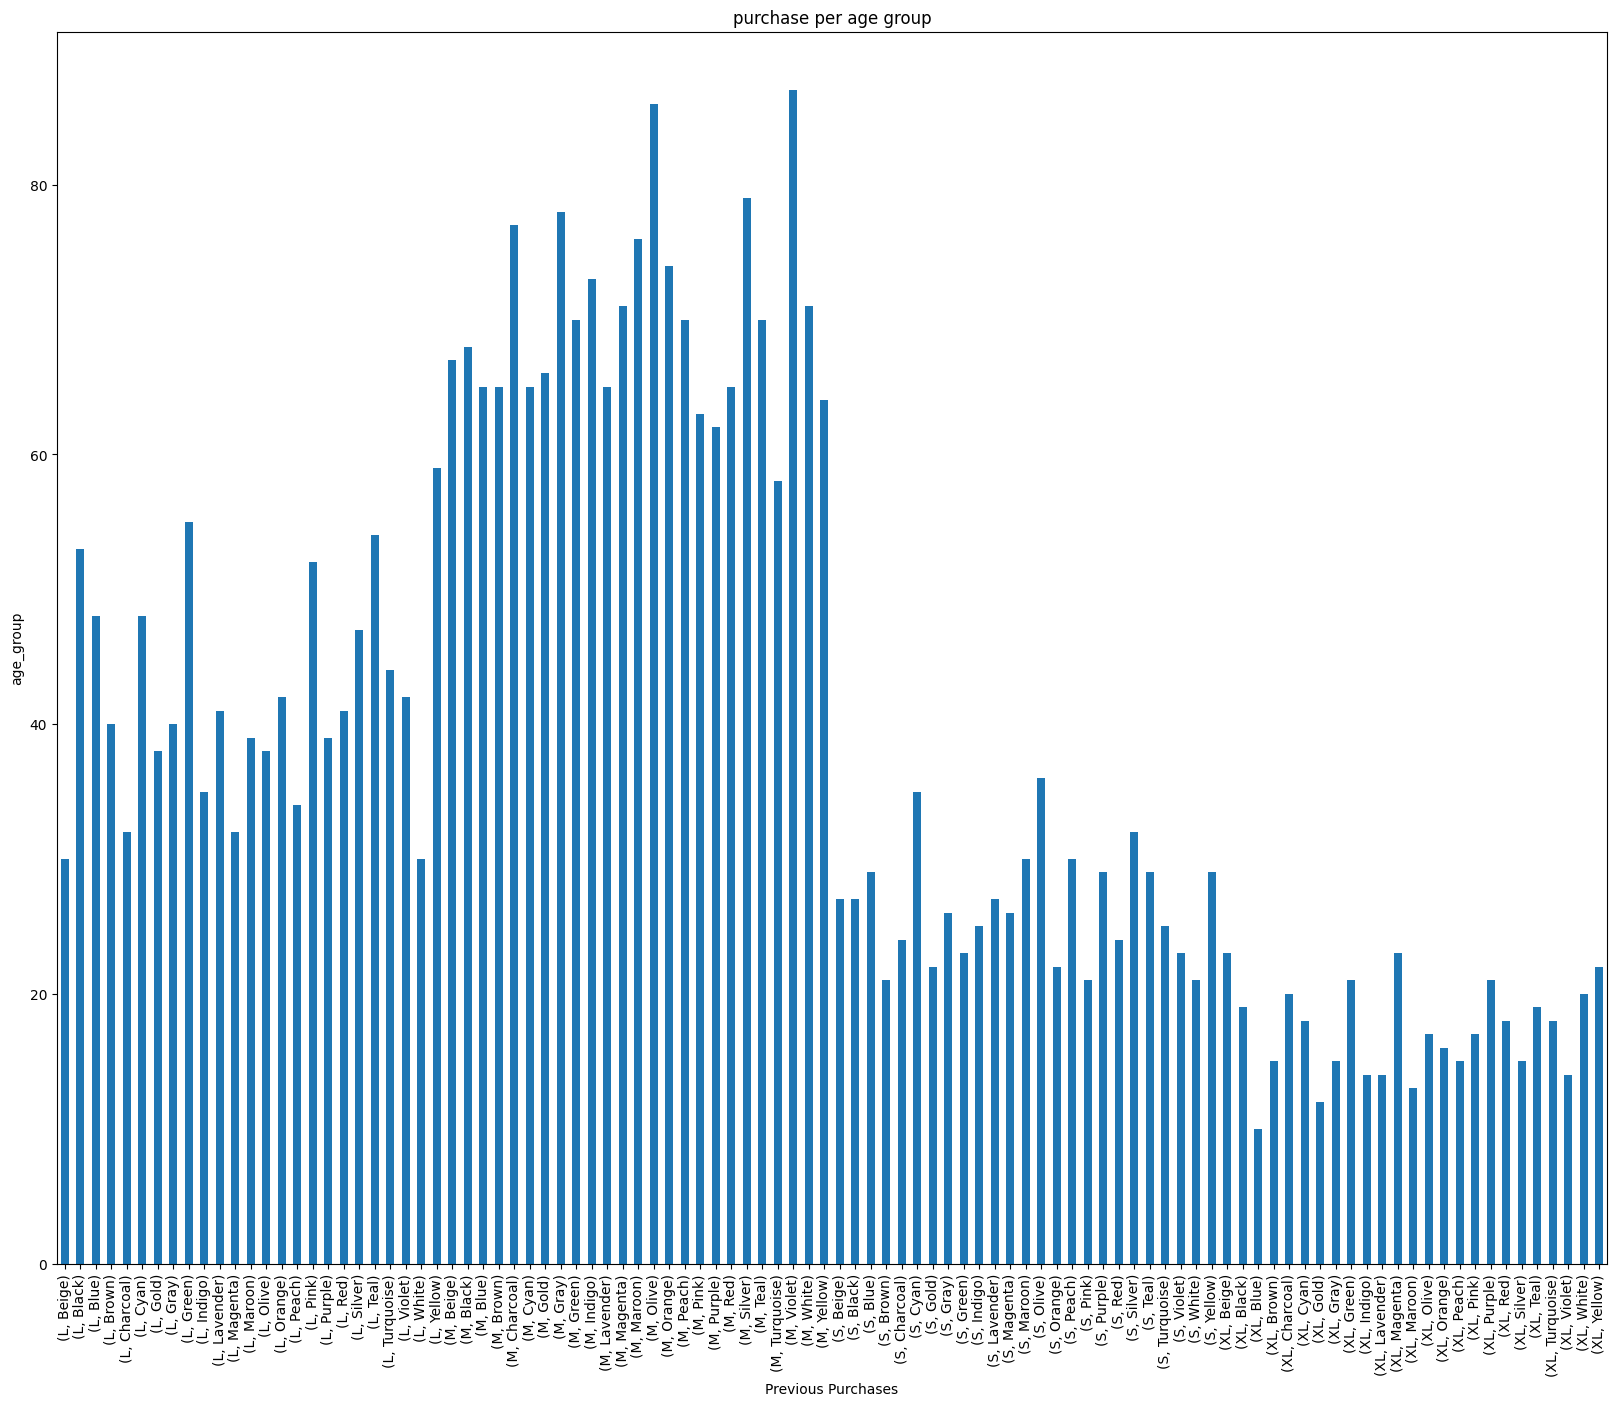

In [43]:
plt.figure(figsize=(20, 16))
size_color.plot(kind='bar')
plt.xlabel('Previous Purchases')
plt.ylabel('age_group')
plt.title('purchase per age group')
plt.show()

In [44]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,age_group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Pre-retirement
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,genz
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Mid life
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,genz
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Mid life


In [45]:
#df.groupby('Frequency of Purchases')['Gender'].count()
freq_of_purchase=df.groupby('Gender')['Frequency of Purchases'].count()
freq_of_purchase

,Frequency of Purchases
Gender,
Female,1248
Male,2652


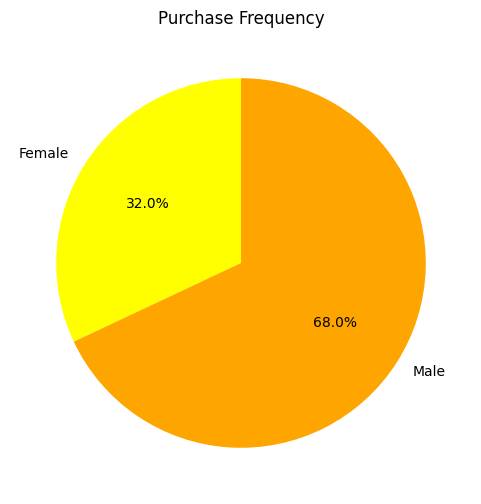

In [46]:
plt.figure(figsize=(6, 6))
freq_of_purchase.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['yellow', 'orange']
)
plt.ylabel('')
plt.title("Purchase Frequency")
plt.show()

In [47]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,age_group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Pre-retirement
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,genz
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Mid life
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,genz
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Mid life


In [48]:
df.groupby('Frequency of Purchases')['Customer ID'].count()

,Customer ID
Frequency of Purchases,
Annually,572
Bi-Weekly,547
Every 3 Months,584
Fortnightly,542
Monthly,553
Quarterly,563
Weekly,539
